# <center>Diagnosticando Cancer de Mama com IA

## 1º Passo: importar as bibliotecas necessárias

Biblioteca nada mais é do que um código escrito por outros programadores que já resolvem determinados problemas. <br>
Desse modo, podemos aproveitar esse código para acelerar muito nosso trabalho.

In [1]:
# importa as bibliotecas necessárias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

## 2º Passo: obter  e 'limpar' os dados necessários

Para sua implementação, a grande maioria dos algoritmos de aprendizado de máquina necessitam de um bom dataset (conjunto de dados). Usei aqui o famoso dataset sobre câncer de mama da Universidade de Wisconsin.<br>
Mais informações em:  https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

<u>SOBRE O CONJUNTO DE DADOS:</u><br>
Os atributos desse conjunto de dados são referentes a imagens digitalizadas obtidas por punção aspirativa por agulha fina de nódulos mamários de pacientes reais.
Esses atributos descrevem características do núcleo celular presente nas imagens, exemplo: área, textura, perímetro, suavidade, concavidade, simetria, etc.

<b> PUNÇÃO ASPIRATIVA
![Image]( https://i0.wp.com/www.americanmedicalcoding.com/wp-content/uploads/2016/03/fine_needle_aspar.jpg?w=385)

<b> EXEMPLO DE ASPIRADO:</b>
![Image](https://media.licdn.com/mpr/mpr/AAEAAQAAAAAAAA2oAAAAJDU2M2EwYjVlLWJhMmEtNGY0ZS05MzE2LTZkZjFhN2MyMjBkZA.png)
A esquerda: BENIGNO - homogeneidade, simetria <br>
A direita: MALIGNO - heterogeneidade, assimetria<br><br>

#### A próxima etapa carrega nosso <i>dataset</i> e o transforma em um dataframe:

In [2]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df['label'] = cancer['target']

#### <br><br>Agora vamos checar dez amostras aletaórias do nosso dataframe:

Perceba que a última coluna - 'label' - contêm apenas os valores 0 e 1. <br>
É ela que indica se a amostra é benigna (0) ou maligna (1)

In [3]:
df.sample(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
556,10.160,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,0.1791,0.06331,...,22.88,67.88,347.3,0.1265,0.1200,0.01005,0.02232,0.2262,0.06742,1
286,11.940,20.76,77.87,441.0,0.08605,0.10110,0.065740,0.03791,0.1588,0.06766,...,27.29,92.20,546.1,0.1116,0.2813,0.23650,0.11550,0.2465,0.09981,1
377,13.460,28.21,85.89,562.1,0.07517,0.04726,0.012710,0.01117,0.1421,0.05763,...,35.63,97.11,680.6,0.1108,0.1457,0.07934,0.05781,0.2694,0.07061,1
103,9.876,19.40,63.95,298.3,0.10050,0.09697,0.061540,0.03029,0.1945,0.06322,...,26.83,72.22,361.2,0.1559,0.2302,0.26440,0.09749,0.2622,0.08490,1
368,21.710,17.25,140.90,1546.0,0.09384,0.08562,0.116800,0.08465,0.1717,0.05054,...,26.44,199.50,3143.0,0.1363,0.1628,0.28610,0.18200,0.2510,0.06494,0
204,12.470,18.60,81.09,481.9,0.09965,0.10580,0.080050,0.03821,0.1925,0.06373,...,24.64,96.05,677.9,0.1426,0.2378,0.26710,0.10150,0.3014,0.08750,1
532,13.680,16.33,87.76,575.5,0.09277,0.07255,0.017520,0.01880,0.1631,0.06155,...,20.20,101.60,773.4,0.1264,0.1564,0.12060,0.08704,0.2806,0.07782,1
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.112600,0.06463,0.1669,0.06544,...,30.80,113.90,869.3,0.1613,0.3568,0.40690,0.18270,0.3179,0.10550,0
22,15.340,14.26,102.50,704.4,0.10730,0.21350,0.207700,0.09756,0.2521,0.07032,...,19.08,125.10,980.9,0.1390,0.5954,0.63050,0.23930,0.4667,0.09946,0
280,19.160,26.60,126.20,1138.0,0.10200,0.14530,0.192100,0.09664,0.1902,0.06220,...,35.90,159.80,1724.0,0.1782,0.3841,0.57540,0.18720,0.3258,0.09720,0


<b><br><br>Por uma análise prévia, consegui identificar os atributos que estariam menos relacionados ao diagnóstico de malignidade, <br>
continuando na etapa de limpar nossos dados, vamos remover esses atributos:
    

In [4]:
df.drop(['worst area', 'texture error', 'perimeter error', 'worst concave points'], axis = 1, inplace = True)

## 3º Passo: Análise e Visualização de Dados

#### Contagem simples da quantidade de amostras benignas e malignas nos nossos dados


       NÚMERO DE AMOSTRAS BENIGNAS: 212  |  NÚMERO DE AMOSTRAS MALIGNAS: 357


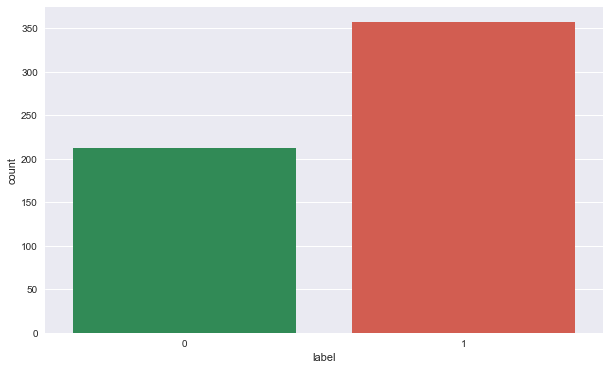

In [5]:
my_palette = ["#229954", "#E74C3C", "#95a5a6", "#e74c3c", "#E74C3C", "#E74C3C"]
sns.set_palette(my_palette)
plt.figure(figsize=(10,6))
sns.countplot(x='label', data=df, palette=my_palette)
print("\n       NÚMERO DE AMOSTRAS BENIGNAS:", len(df[df['label']==0]), end="  |  ")
print("NÚMERO DE AMOSTRAS MALIGNAS:", len(df[df['label']==1]))

<b> Só por curiosidade, imagine se pudéssemos observar uma curva que resumisse todos os dados. Para fazer isso, normalizamos os dados, em seguida, calculamos a média de cada atributo e plotamos em duas curvas, separando os casos benignos dos malignos

In [6]:
from meu_modulo import normalizar, curva

benigno = df[df['label']==0].mean().drop('label').apply(normalizar)
maligno = df[df['label']==1].mean().drop('label').apply(normalizar)

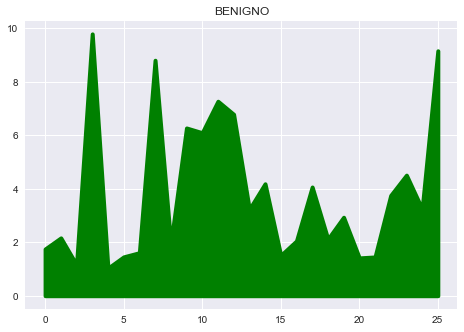

In [7]:
curva(benigno, "BENIGNO")

A curva acima representa uma média dos atributos dos casos benignos e a debaixo, dos malignos

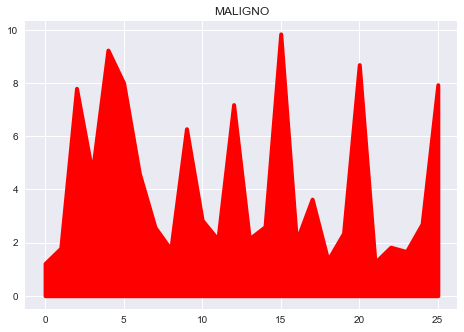

In [8]:
curva(maligno, "MALIGNO", 'red')

<b>Para concluir esse exercício de curiosidade, plotamos o mesmo tipo de curva com uma amostra aleatória. <br>
Baseado nas outras curvas, tente descobrir a resposta: Essa curva representa uma amostra benigna ou maligna?<br></b>
<br><br>resposta abaixo...

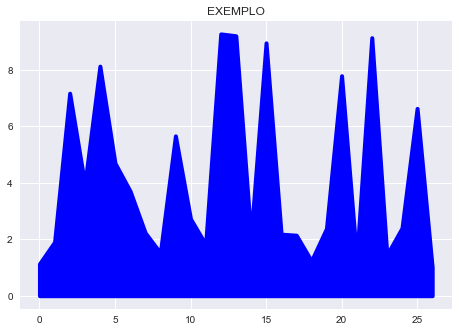

In [9]:
amostra_aleatoria = np.random.randint(1,569)
exemplo = df.loc[amostra_aleatoria].apply(normalizar)
curva(exemplo, "EXEMPLO", 'blue')
print('\n ')

In [10]:
print (' RESPOSTA: BENIGNO') if df.loc[amostra_aleatoria][-1] == 0 else print ('MALIGNO')

MALIGNO


<b>O gráfico abaixo demonstra a correlação entre as variáveis:<br>
Quanto mais próximo de 1, maior é a correlação positiva entre elas;</b> = => "Quando uma aumenta a outra também aumenta"<br><b>
Quanto mais próximo de -1, maior é a correlação negativa entre elas;</b> = => "Quando uma aumenta a outra diminui"<br><b>
Quanto mais próximo de 0, menor é a correlação positiva entre elas.

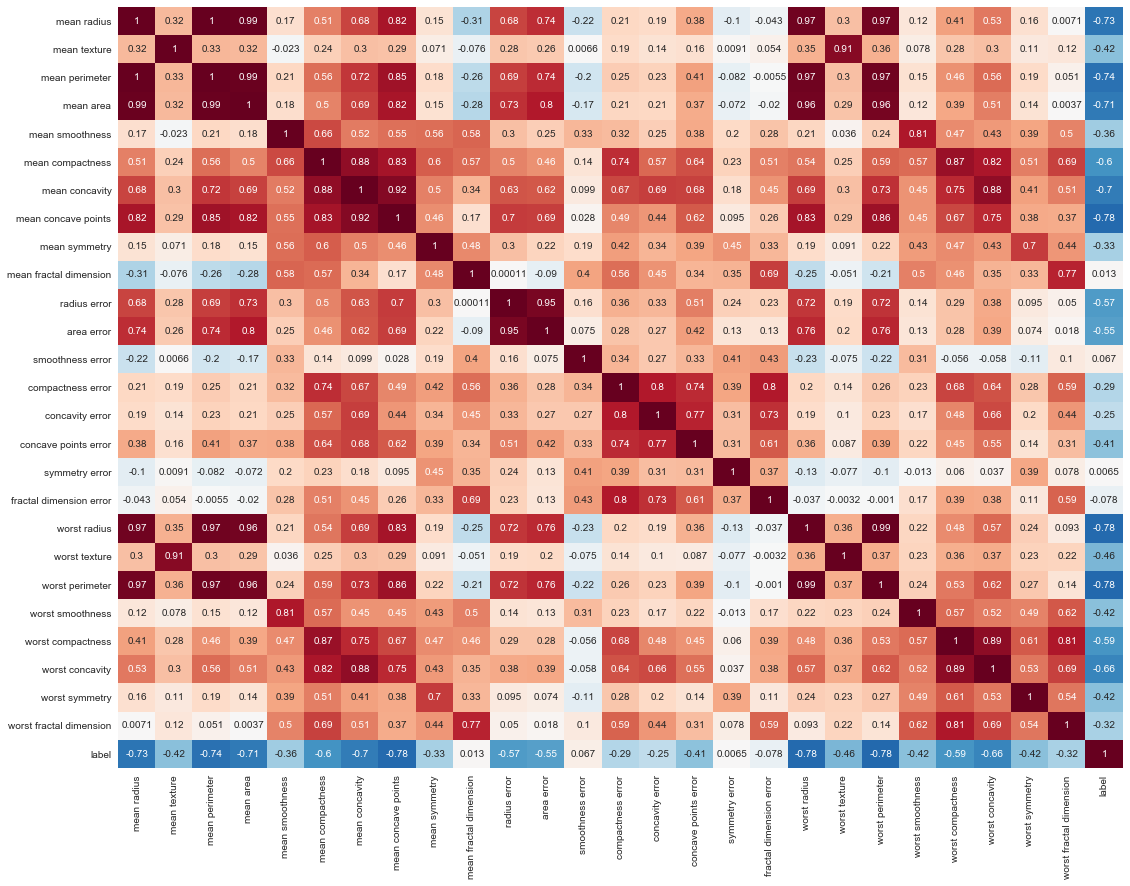

In [11]:
plt.figure(figsize=(18,14))
sns.heatmap(data=df.corr(), annot=True, cbar=False)

#### Baseado nas correlações acima, podemos escolher apenas variáveis mais fortemente correlacionadas com a nossa coluna alvo - 'label' e excluir o restante, 'limpando' ainda mais nossos dados.

In [12]:
df = df[['mean radius', 'mean perimeter', 'mean area', 'mean compactness', 'mean concavity', 'mean concave points', 
         'worst radius', 'worst perimeter', 'worst concavity', 'label']]

## 4º Passo: Escolher e implementar o algoritmo de Aprendizado de Máquina

<b>Dividimos o dataframe em X (atributos) e y (rótulo), em seguida, separamos 30% das amostras para testar nosso modelo. <br>
Ou seja, após 'treinarmos' o modelo, nosso algoritmo vai tentar prever o resultado desses 30% sem ver a resposta

In [13]:
X = df
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Implementação do algoritmo 'Máquina de Vetores de Suporte' para classificação das amostras como maligno ou benigno

In [14]:
modelo = SVC()
modelo.fit(X_train, y_train)
previsões = modelo.predict(X_test)
param_grid = {'C':[.1, 1, 10, 100, 1000], 'gamma':[1, .1, .01, .001, .0001]}
grid = GridSearchCV(SVC(), param_grid, verbose=0)
grid.fit(X_train, y_train)
previsões = grid.predict(X_test)


Se checarmos nossas previsões, veremos que ela é uma lista de 'zeros' e 'uns', que são o 'palpite' do algoritmo para os casos benignos e malignos, respectivamente

In [15]:
previsões

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0])

### Por fim, medimos a acurácia do modelo:

In [16]:
print(classification_report(y_test, previsões))
print("\n |= = =>  A ACURÁCIA DO MODELO FOI DE {0:.2f}%  <= = =|".format(accuracy_score(y_test, previsões)*100))

             precision    recall  f1-score   support

          0       0.97      1.00      0.99        68
          1       1.00      0.98      0.99       103

avg / total       0.99      0.99      0.99       171


 |= = =>  A ACURÁCIA DO MODELO FOI DE 98.83%  <= = =|


##     <br><br>&nbsp;&nbsp;&nbsp;&nbsp;Acabamos de criar uma aplicação capaz de diagnosticar a malignidade de um câncer de mama com 98% de acurária e fizemos isso em poucos minutos. Apesar de ser um resultado excelente para o tempo que gastamos, talvez ainda não seja suficiente para ser aplicado na vida real. 
## &nbsp;&nbsp;&nbsp;&nbsp;Existem formas de melhorar nosso algoritmo para conseguir resultados ainda melhores, mas isso já foge do escopo desse exemplo... 
